# Housing and community amenities

A variável **"Housing and Community Amenities"** representa um dos pilares fundamentais para a qualidade de vida nas sociedades modernas. Esse indicador abrange o acesso a habitação adequada e a infraestrutura comunitária essencial, como transporte, saneamento básico, eletricidade, e espaços públicos. Esses elementos são cruciais não apenas para garantir o bem-estar físico, mas também para promover coesão social, inclusão e desenvolvimento sustentável.

<br>

A **distribuição e qualidade das amenidades comunitárias** são um reflexo direto das políticas públicas e da alocação de recursos, o que pode impactar profundamente a vida dos cidadãos. Quando há acesso desigual a essas condições, surgem disparidades que perpetuam ciclos de pobreza e exclusão social. Regiões com **infraestrutura precária** tendem a enfrentar desafios como o aumento da criminalidade, marginalização e menor acesso a oportunidades econômicas, educação e saúde.

<br>

Além disso, a **habitação** e as amenidades comunitárias influenciam diretamente o **desenvolvimento urbano**. Cidades com políticas eficazes nessa área experimentam **crescimento sustentável**, enquanto aquelas que ignoram essas necessidades enfrentam o agravamento da desigualdade e a deterioração da qualidade de vida.

<br>

Portanto, monitorar e analisar o indicador "Housing and Community Amenities" é essencial para identificar **lacunas estruturais** e direcionar **intervenções políticas eficazes**. Isso nos permite garantir que todos os cidadãos tenham acesso a uma vida digna, melhorando suas condições sociais e econômicas, além de fortalecer a **resiliência urbana** em um mundo que enfrenta desafios como urbanização acelerada e mudanças climáticas.

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

Lendo o arquivo tratado

In [12]:
df = pd.read_csv('combined_WID_cleaned.csv')
df.head()

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
0,p0p100,1917,1168229.0,New Jersey,Population,Population,tax unit,Adults,population
1,p0p100,1918,1178440.0,New Jersey,Population,Population,tax unit,Adults,population
2,p0p100,1919,1204412.0,New Jersey,Population,Population,tax unit,Adults,population
3,p0p100,1920,1238146.0,New Jersey,Population,Population,tax unit,Adults,population
4,p0p100,1921,1279734.0,New Jersey,Population,Population,tax unit,Adults,population


Filtrando os resultados para:

- indicador  = Housing and community amenities

- tipo = Population

- ano >= 1985

In [36]:
df_wir = df.query("indicador == 'Housing and community amenities' and ano >= 1985 and tipo == 'Wealth-income ratio'")
df_wir.head()

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
36344,p0p100,1985,0.008984,the British Virgin Islands,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
36345,p0p100,1986,0.009361,the British Virgin Islands,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
36346,p0p100,1987,0.010148,the British Virgin Islands,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
36347,p0p100,1988,0.010066,the British Virgin Islands,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
36348,p0p100,1989,0.009428,the British Virgin Islands,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income


In [37]:
df_wir.shape

(10023, 9)

In [38]:
df_wir['percentil'].unique()

array(['p0p100'], dtype=object)

In [39]:
len(df_wir['pais'].unique())

256

In [40]:
df_wir['unidade'].unique()

array(['% of national income', nan], dtype=object)

### 1 - Comparando todos os paises

In [42]:
fig = px.line(df_wir, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Moradia e comodidades comunitárias - Relação riqueza-renda",
              labels={
                  "valor": "% of national income",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()

## 2 - Top 10 paises com as maiores receitas totais comparados com o Brasil

In [43]:
df_rev_pivot = df_wir.pivot_table(index='pais', values='valor', aggfunc='median')
df_rev_ordered = df_rev_pivot.sort_values(by='valor', ascending=False)
df_rev_ordered

,valor
pais,
Botswana,0.042699
Samoa,0.035590
the French Polynesia,0.034939
Oman,0.034764
Algeria,0.034340
...,...
Taiwan,0.001385
Sierra Leone,0.001370
Palestine,0.001301


In [44]:
brazil_rev_df = df_rev_ordered.query("pais == 'Brazil'")

top_10_rev_df = df_rev_ordered.head(10)

result_rev_df = pd.concat([brazil_rev_df, top_10_rev_df]).drop_duplicates()

result_rev_df

,valor
pais,
Brazil,0.012566
Botswana,0.042699
Samoa,0.035590
the French Polynesia,0.034939
Oman,0.034764
Algeria,0.034340
Kuwait,0.034129
Tonga,0.033575
Maldives,0.029401


In [45]:
country_name_list = list(result_rev_df.index)
country_name_list

['Brazil',
 'Botswana',
 'Samoa',
 'the French Polynesia',
 'Oman',
 'Algeria',
 'Kuwait',
 'Tonga',
 'Maldives',
 'Fiji',
 "Cote d'Ivoire"]

In [46]:
df_rev_filtered = df_wir.query(f'pais in {country_name_list}')
df_rev_filtered

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
113164,p0p100,1985,0.032564,Tonga,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
113165,p0p100,1986,0.030957,Tonga,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
113166,p0p100,1987,0.031459,Tonga,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
113167,p0p100,1988,0.030710,Tonga,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
113168,p0p100,1989,0.034197,Tonga,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
...,...,...,...,...,...,...,...,...,...
46182310,p0p100,2019,0.024114,Maldives,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
46182311,p0p100,2020,0.037040,Maldives,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
46182312,p0p100,2021,0.028364,Maldives,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income
46182313,p0p100,2022,0.029401,Maldives,Housing and community amenities,Wealth-income ratio,individuals,All Ages,% of national income


In [47]:
fig = px.line(df_rev_filtered, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Top 10 paises com maiores relação riqueza-renda para Moradia e comodidades comunitárias",
              labels={
                  "valor": "% of national income",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


In [ ]:
plt.figure(figsize=(10, 6))  
sns.boxplot(y='pais', x='valor', data=df_rev_filtered)

plt.yticks(rotation=45)

plt.title('Analise por País - Receitas Totais')
plt.xlabel('País')
plt.ylabel('Valor')

plt.show()

## 3 - Filtrando por alguns paises em espeficico

In [48]:
paises = ['Brazil', 'China', 'France', 'the USA', 'Canada', 'Japan', 'Mexico', 'Australia', 'India', 'Sweden', 'Finland']


In [49]:
df_paises_espec = df_wir.query(f'pais in {paises}')
df_paises_espec['pais'].unique()

array(['Mexico', 'Canada', 'Brazil', 'Finland', 'India', 'France',
       'Japan', 'Sweden', 'China', 'the USA', 'Australia'], dtype=object)

In [50]:
fig = px.line(df_paises_espec, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Relação riqueza-renda - Comparativo entre Países quanto Moradia e comodidades comunitárias",
              labels={
                  "valor": "% of national income",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


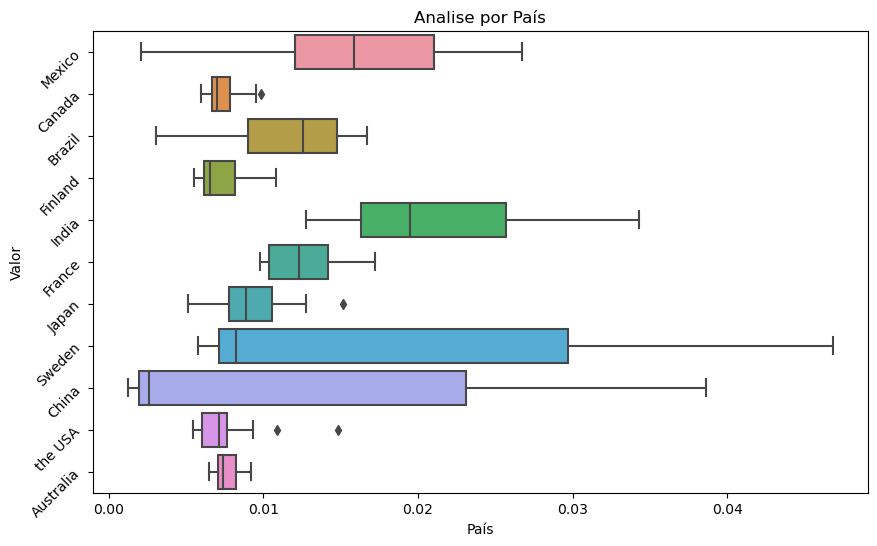

In [51]:
plt.figure(figsize=(10, 6))  
sns.boxplot(y='pais', x='valor', data=df_paises_espec)

plt.yticks(rotation=45)

plt.title('Analise por País')
plt.xlabel('País')
plt.ylabel('Valor')

plt.show()

## 4 - CONCLUSÃO

A baixa taxa da relação da riqueza-renda no Brasil nos anos de 2002 podem ser explicadas devido a fatores econômicos destes períodos 

### Inflação de 2002 no Brasil
A inflação de 2002 no Brasil foi principalmente provocada pela instabilidade política em um ano eleitoral, resultando em fuga de capitais e na desvalorização do real.
O aumento dos custos de importação, especialmente de combustíveis e insumos, gerou uma inflação de custo que foi intensificada pelo repasse desses aumentos aos preços de produtos e serviços no mercado interno.
Para combater a inflação, o Banco Central decidiu aumentar a taxa de juros, mas os efeitos já eram visíveis, culminando em uma inflação acumulada de 12,53% ao final de 2002.

### Crise e Taxa de Desemprego alta em 2015
Em 2015, o Brasil experimentou um aumento significativo na taxa de desemprego, impulsionado por uma profunda recessão econômica, alta inflação e um cenário político instável sob o governo de Dilma Rousseff.
As políticas adotadas, que incluíam medidas de austeridade e tentativas de estimular a economia, não conseguiram mitigar a crise, resultando em um crescimento do desemprego e uma desconfiança generalizada no mercado.
A crise política culminou em um processo de impeachment, que continuou a ter repercussões negativas na economia nos anos seguintes.

## 5 - REFERÊNCIAS

https://www.scielo.br/j/rcf/a/Ff3W7zwpRycg4dBvMfxbSLL/?lang=pt

https://repositorio.ufu.br/handle/123456789/26518